Current Working Directory: C:\Users\Johnny W. Harbeson\M07
Files in Current Directory: ['.ipynb_checkpoints', 'M07 Lab.ipynb', 'output', 'telco_churn.csv']
Data from CSV:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3,2.70,1.0,False
1,OH,107,415,No,Yes,26,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3,3.70,1.0,False
2,NJ,137,415,No,No,0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5,3.29,0.0,False
3,OH,84,408,Yes,No,0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7,1.78,2.0,False
4,OK,75,415,Yes,No,0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3,2.73,3.0,False



Data from JSON:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,San Francisco
2,Charlie,35,Los Angeles



Data from Dictionary:


,Product,Price,Quantity
0,Laptop,1000,50
1,Tablet,500,30
2,Smartphone,800,100


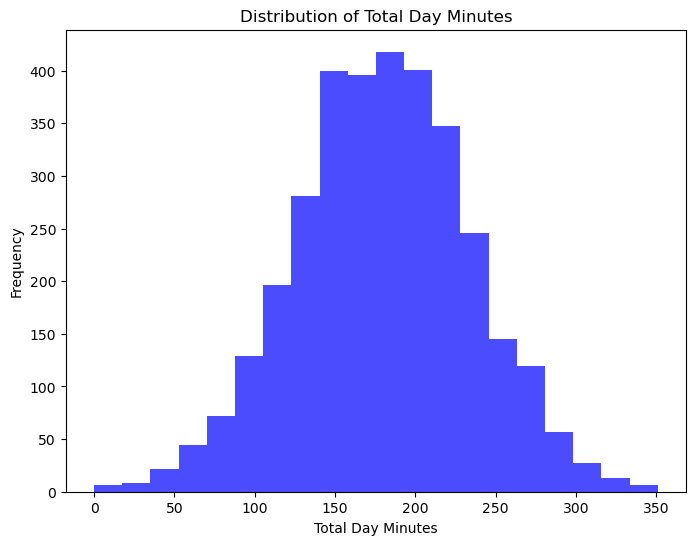

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import os

file_path = r'C:\Users\Johnny W. Harbeson\M07\telco_churn.csv'  # Use the full path

print("Current Working Directory:", os.getcwd())
print("Files in Current Directory:", os.listdir(os.path.dirname(file_path)))  # List files in the directory (helps me not get confused)

if os.path.exists(file_path):
    data = pd.read_csv(file_path)
else:
    print(f"Error: The file at {file_path} was not found.")
    data = None

json_data = '''
[
  {"Name": "Alice", "Age": 25, "City": "New York"},
  {"Name": "Bob", "Age": 30, "City": "San Francisco"},
  {"Name": "Charlie", "Age": 35, "City": "Los Angeles"}
]
'''
df_json = pd.read_json(StringIO(json_data))

dict_data = {
    "Product": ["Laptop", "Tablet", "Smartphone"],
    "Price": [1000, 500, 800],
    "Quantity": [50, 30, 100]
}
df_dict = pd.DataFrame(dict_data)

if data is not None:
    print("Data from CSV:")
    display(data.head())
else:
    print("No data to display from CSV.")

print("\nData from JSON:")
display(df_json.head())
print("\nData from Dictionary:")
display(df_dict.head())

if data is not None:
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    if 'Total day minutes' in data.columns:
        data['Total day minutes (normalized)'] = (data['Total day minutes'] - data['Total day minutes'].min()) / \
                                                 (data['Total day minutes'].max() - data['Total day minutes'].min())

    if 'Total day minutes' in data.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(data['Total day minutes'].dropna(), bins=20, color='blue', alpha=0.7)
        plt.title('Distribution of Total Day Minutes')
        plt.xlabel('Total Day Minutes')
        plt.ylabel('Frequency')
        plt.show()

output_path = 'output/processed_data'
os.makedirs(os.path.dirname(output_path), exist_ok=True)

if data is not None:
    data.to_csv(f'{output_path}.csv', index=False)
    data.to_json(f'{output_path}.json', orient='records')
    data.to_html(f'{output_path}.html')